## 라이브러리 호출

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import warnings # 경고 제거용
warnings.filterwarnings("ignore", category=DeprecationWarning)

## 데이터 생성

In [6]:
np.random.seed(0)
num_samples = 1000
x1 = np.random.uniform(0, 1, num_samples)
x2 = np.random.uniform(0, 1, num_samples)
Input = np.column_stack((x1, x2))
y = 2*x1 + 3*x2 - 1

## ANN 구조 및 가중치 초기값 결정

In [7]:
hidden_layer_size = 3
input_layer_size = 2
output_layer_size = 1

W1 = np.random.rand(hidden_layer_size, input_layer_size)
b1 = np.random.rand(hidden_layer_size)
W2 = np.random.rand(output_layer_size, hidden_layer_size)
b2 = np.random.rand(output_layer_size)

## 시그모이드, 시그모이드 미분 함수 정의

In [8]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

## 모델 학습

In [9]:
alpha = 0.01
epochs = 50
MSE_list, MAPE_list = [], []

for epoch in range(epochs):
    MSE, MAPE = 0, 0
    for iter in range(num_samples):
        X = Input[iter]

        # 순전파
        Z = W1 @ X.reshape(-1, 1) + b1.reshape(-1, 1)
        h = sigmoid(Z)
        y_pred = W2 @ h + b2

        # Loss
        J = 0.5 * (y_pred - y[iter])**2
        MSE += J
        MAPE += np.abs(y_pred - y[iter]) / np.abs(y[iter]) * 100

        # 역전파
        dJdY = y_pred - y[iter]
        dJdb2 = dJdY
        dJdW2_11, dJdW2_12, dJdW2_13 = dJdY * h[0], dJdY * h[1], dJdY * h[2]

        dJdh1, dJdh2, dJdh3 = dJdY * W2[0, 0], dJdY * W2[0, 1], dJdY * W2[0, 2]
        dJdZ1 = dJdh1 * sigmoid_derivative(h[0])
        dJdZ2 = dJdh2 * sigmoid_derivative(h[1])
        dJdZ3 = dJdh3 * sigmoid_derivative(h[2])

        dJdW1_11, dJdW1_12 = dJdZ1 * X[0], dJdZ1 * X[1]
        dJdW1_21, dJdW1_22 = dJdZ2 * X[0], dJdZ2 * X[1]
        dJdW1_31, dJdW1_32 = dJdZ3 * X[0], dJdZ3 * X[1]

        dJdb1_11 = dJdZ1
        dJdb1_21 = dJdZ2
        dJdb1_31 = dJdZ3

        # 경사하강법
        W1[0][0] -= alpha * dJdW1_11
        W1[0][1] -= alpha * dJdW1_12
        W1[1][0] -= alpha * dJdW1_21
        W1[1][1] -= alpha * dJdW1_22
        W1[2][0] -= alpha * dJdW1_31
        W1[2][1] -= alpha * dJdW1_32
        W2[0][0] -= alpha * dJdW2_11
        W2[0][1] -= alpha * dJdW2_12
        W2[0][2] -= alpha * dJdW2_13
        b1[0] -= alpha * dJdb1_11
        b1[1] -= alpha * dJdb1_21
        b1[2] -= alpha * dJdb1_31
        b2[0] -= alpha * dJdb2

    # 에러 출력
    MSE /= num_samples
    MAPE /= num_samples
    MSE_list.append(np.squeeze(MSE))
    MAPE_list.append(np.squeeze(MAPE))
    if epoch % 5 == 0 or epoch == epochs - 1:
        print(f'MSE and MAPE at epoch {epoch}: {np.squeeze(MSE):.4f}, {np.squeeze(MAPE):.2f}%')

MSE and MAPE at epoch 0: 0.4924, 641.22%
MSE and MAPE at epoch 5: 0.0222, 107.67%
MSE and MAPE at epoch 10: 0.0011, 6.33%
MSE and MAPE at epoch 15: 0.0009, 6.29%
MSE and MAPE at epoch 20: 0.0009, 6.36%
MSE and MAPE at epoch 25: 0.0008, 6.42%
MSE and MAPE at epoch 30: 0.0008, 6.47%
MSE and MAPE at epoch 35: 0.0008, 6.57%
MSE and MAPE at epoch 40: 0.0008, 6.72%
MSE and MAPE at epoch 45: 0.0008, 6.82%
MSE and MAPE at epoch 49: 0.0008, 6.88%


## 에러 시각화

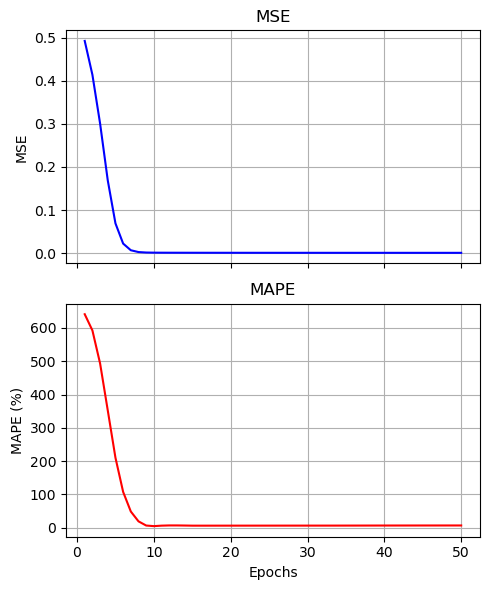

In [10]:
fig, ax = plt.subplots(2, 1, figsize=(5, 6), sharex=True)

ax[0].plot(np.arange(1, epochs + 1), MSE_list, label='MSE', color='b', linewidth=1.5)
ax[0].set_ylabel("MSE")
ax[0].set_title("MSE")
ax[0].grid(True)

ax[1].plot(np.arange(1, epochs + 1), MAPE_list, label='MAPE', color='r', linewidth=1.5)
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("MAPE (%)")
ax[1].set_title("MAPE")
ax[1].grid(True)

plt.tight_layout()
plt.show()